### Introduction to Feature Engineering 

In [3]:
# It is a process of transforming raw variables to create new variables

In [1]:
# Load the dataset - bank data
import pandas as pd

In [2]:
# Reading the first five rows
# Historical data
# A history of customers who bought term deposits
bankData = pd.read_csv('bank-full.csv', sep=';')
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# Look at the shape of the data
bankData.shape 

(45211, 17)

In [4]:
# Business Problem: Understand who and what features to drive our campaign
# Business Hypothesis: Business drivers
bankData.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
# One crucial step is Visualisation for EDA
# Why? It helps in deriving business intuitions

In [6]:
# 1st Business Hypothesis: Does age influence the propensity to buy term deposits 

# The propensity to buy term deposits is more with elderly customers compared
# to younger ones

In [8]:
bankData[['age', 'y']].head()

,age,y
0,58,no
1,44,no
2,33,no
3,47,no
4,33,no


In [9]:
# import a data visualisation package
import altair as alt 

In [10]:
#!pip install altair 

In [11]:
# Pandas methods .groupby, .agg, .reset_index

In [12]:
bankData['y'].unique()

array(['no', 'yes'], dtype=object)

In [13]:
# Create a filter 
filter_mask = bankData['y'] == 'yes'

bankSub1 = bankData[filter_mask].groupby('age')['y'].agg(agegrp='count').reset_index()

In [14]:
bankSub1.head(10)

,age,agegrp
0,18,7
1,19,11
2,20,15
3,21,22
4,22,40
5,23,44
6,24,68
7,25,113
8,26,134
9,27,141


In [15]:
# Visualise the relationship
alt.Chart(bankSub1).mark_line().encode(x='age', y='agegrp')

alt.Chart(...)

In [16]:
# Group the data per age .groupby
# Find the total number of customers under each age group .agg

In [17]:
ageTot = bankData.groupby('age')['y'].agg(ageTot= 'count').reset_index()

In [18]:
ageTot.head(10)

,age,ageTot
0,18,12
1,19,35
2,20,50
3,21,79
4,22,129
5,23,202
6,24,302
7,25,527
8,26,805
9,27,909


In [19]:
# Group the data by age and propensity of purchase
# Total counts for under each category of prop(yes & no)
ageProp = bankData.groupby(['age', 'y'])['y'].agg(ageCat='count').reset_index()

In [20]:
ageProp.head()

,age,y,ageCat
0,18,no,5
1,18,yes,7
2,19,no,24
3,19,yes,11
4,20,no,35


In [21]:
# Merge ageTot and ageProp
# Merging both the data frames
ageComb = pd.merge(ageProp, ageTot,left_on = ['age'], right_on = ['age'])
ageComb['catProp'] = (ageComb.ageCat/ageComb.ageTot)*100
ageComb.head()

,age,y,ageCat,ageTot,catProp
0,18,no,5,12,41.666667
1,18,yes,7,12,58.333333
2,19,no,24,35,68.571429
3,19,yes,11,35,31.428571
4,20,no,35,50,70.000000


In [22]:
# Visualising the relationship using altair
alt.Chart(ageComb).mark_line().encode(x='age', y='catProp').facet(column='y')

alt.FacetChart(...)

In [23]:
# 👆🏽 Intuitions from the EDA

In [24]:
#bankData.columns # Jobs

In [25]:
bankData['job'].head()

0      management
1      technician
2    entrepreneur
3     blue-collar
4         unknown
Name: job, dtype: object

In [26]:
# The propensity to buy term deposit is higher based on status of the job

In [27]:
# Getting the total counts under each job category
jobTot = bankData.groupby('job')['y'].agg(jobTot='count').reset_index()
jobTot

,job,jobTot
0,admin.,5171
1,blue-collar,9732
2,entrepreneur,1487
3,housemaid,1240
4,management,9458
5,retired,2264
6,self-employed,1579
7,services,4154
8,student,938
9,technician,7597


In [28]:
# Getting all the details in one place
jobProp = bankData.groupby(['job', 'y'])['y'].agg(jobCat='count').reset_index()
jobProp

,job,y,jobCat
0,admin.,no,4540
1,admin.,yes,631
2,blue-collar,no,9024
3,blue-collar,yes,708
4,entrepreneur,no,1364
5,entrepreneur,yes,123
6,housemaid,no,1131
7,housemaid,yes,109
8,management,no,8157
9,management,yes,1301


In [29]:
# Merging both the data frames
jobComb = pd.merge(jobProp, jobTot, on=['job'])
jobComb['catProp'] = (jobComb.jobCat/jobComb.jobTot)*100

jobComb

,job,y,jobCat,jobTot,catProp
0,admin.,no,4540,5171,87.797331
1,admin.,yes,631,5171,12.202669
2,blue-collar,no,9024,9732,92.725031
3,blue-collar,yes,708,9732,7.274969
4,entrepreneur,no,1364,1487,91.728312
5,entrepreneur,yes,123,1487,8.271688
6,housemaid,no,1131,1240,91.209677
7,housemaid,yes,109,1240,8.790323
8,management,no,8157,9458,86.244449
9,management,yes,1301,9458,13.755551


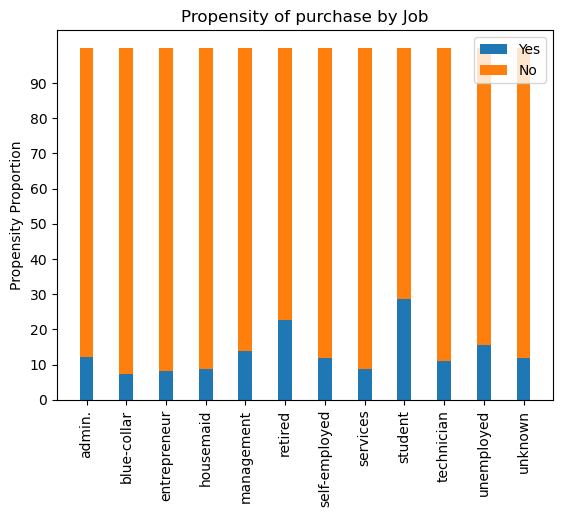

In [30]:
# Visualize 
import matplotlib.pyplot as plt
import numpy as np

# Create seperate data frames for Yes and No
jobcombYes = jobComb[jobComb['y'] == 'yes']
jobcombNo = jobComb[jobComb['y'] == 'no']

# Get the length of the xaxis labels 
xlabels = jobTot['job'].nunique()

# Get the proportion values 
jobYes = jobcombYes['catProp'].unique()
jobNo = jobcombNo['catProp'].unique()

# Arrange the indexes of x asix
ind = np.arange(xlabels)

# Get the width of each bar
width = 0.35  

# Getting the plots
p1 = plt.bar(ind, jobYes, width)
p2 = plt.bar(ind, jobNo, width,bottom=jobYes)

plt.ylabel('Propensity Proportion')
plt.title('Propensity of purchase by Job')

# Defining the x label indexes and y label indexes
plt.xticks(ind, jobTot['job'].unique())
plt.yticks(np.arange(0, 100, 10))

# Defining the legends
plt.legend((p1[0], p2[0]), ('Yes', 'No'))

# To rotate the axis labels 
plt.xticks(rotation=90)
plt.show()

### Intro to Feature Engineering 

In [31]:
# It is a process of transforming raw variables to create new variables
# It is a critical step in improving the accuracy of your model

In [32]:
# Two broad types of feature engineering 
# 1. Transform raw variables based on intuition - business perspective/domain
# 2. Transform raw variables based on statistical and data normalisation perspectives 

In [33]:
# Single variable analysis for feature engineering 
# Multiple variable analysis for feature engineering 

In [34]:
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Feature Engineering - Business Driven

Individual Features

In [35]:
# Relationship between housing and propensity for term deposits
bankData.groupby(['housing', 'y'])['y'].agg(houseTot='count').reset_index()

,housing,y,houseTot
0,no,no,16727
1,no,yes,3354
2,yes,no,23195
3,yes,yes,1935


In [36]:
(3354 / (3354 + 16727)) # Lets see the percentage to guage propensity - Housing

0.1670235546038544

In [37]:
(1935 / (1935 + 23195))

0.07699960206923995

In [38]:
# Relationship between having a loan and propensity for term deposits
bankData.groupby(['loan', 'y'])['y'].agg(loanTot='count').reset_index()

,loan,y,loanTot
0,no,no,33162
1,no,yes,4805
2,yes,no,6760
3,yes,yes,484


In [39]:
(4805 / (4805 + 33162)) # Lets see the percentage to guage propensity - Loan

0.12655727342165565

In [40]:
(484 / (484 + 6760))

0.06681391496410823

In [41]:
# It is easier for categorical variables
# How do you analyse for numerical variables
# One strategy is to convert numerical to into ordinal data

In [42]:
bankData['balance'].head()

0    2143
1      29
2       2
3    1506
4       1
Name: balance, dtype: int64

In [73]:
# Taking the quantiles for 25%, 50% and 75% of the balance data
import numpy as np 

In [74]:
np.quantile(bankData['balance'],[.25,.5,.75])

array([  72.,  448., 1428.])

In [75]:
# Creating new features for bank data based on the quantile values

bankData['balanceClass'] = 'Quant1'

bankData.loc[(bankData['balance'] > 72) & (bankData['balance'] < 448), 'balanceClass'] = 'Quant2'

bankData.loc[(bankData['balance'] > 448) & (bankData['balance'] < 1428), 'balanceClass'] = 'Quant3'

bankData.loc[bankData['balance'] > 1428, 'balanceClass'] = 'Quant4'

bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran,assetIndex,assetClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,-1,0,unknown,no,Quant4,0.092269,5,5,2.306734,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,-1,0,unknown,no,Quant1,0.073077,5,5,1.826916,Quant3
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,-1,0,unknown,no,Quant1,0.072832,1,5,0.364158,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,-1,0,unknown,no,Quant4,0.086486,5,5,2.162153,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,-1,0,unknown,no,Quant1,0.072822,5,1,0.364112,Quant1


In [82]:
# Calculating the customers under each quantile 
balanceTot = bankData.groupby(['balanceClass'])['y'].agg(balanceTot='count').reset_index()
balanceTot

,balanceClass,balanceTot
0,Quant1,11340
1,Quant2,11275
2,Quant3,11299
3,Quant4,11297


In [83]:
# Calculating the total customers categorised as per quantile and propensity classification
balanceProp = bankData.groupby(['balanceClass', 'y'])['y'].agg(balanceCat='count').reset_index()
balanceProp

,balanceClass,y,balanceCat
0,Quant1,no,10517
1,Quant1,yes,823
2,Quant2,no,10049
3,Quant2,yes,1226
4,Quant3,no,9884
5,Quant3,yes,1415
6,Quant4,no,9472
7,Quant4,yes,1825


In [84]:
# Merging both the data frames
balanceComb = pd.merge(balanceProp, balanceTot, on = ['balanceClass'])
balanceComb['catProp'] = (balanceComb.balanceCat / balanceComb.balanceTot)*100
balanceComb

,balanceClass,y,balanceCat,balanceTot,catProp
0,Quant1,no,10517,11340,92.742504
1,Quant1,yes,823,11340,7.257496
2,Quant2,no,10049,11275,89.126386
3,Quant2,yes,1226,11275,10.873614
4,Quant3,no,9884,11299,87.476768
5,Quant3,yes,1415,11299,12.523232
6,Quant4,no,9472,11297,83.845269
7,Quant4,yes,1825,11297,16.154731


In [85]:
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran,assetIndex,assetClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,-1,0,unknown,no,Quant4,0.092269,5,5,2.306734,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,-1,0,unknown,no,Quant1,0.073077,5,5,1.826916,Quant3
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,-1,0,unknown,no,Quant1,0.072832,1,5,0.364158,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,-1,0,unknown,no,Quant4,0.086486,5,5,2.162153,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,-1,0,unknown,no,Quant1,0.072822,5,1,0.364112,Quant1


In [50]:
# Assumptions 
# House ownership and or high bank balance is a plus - 5
# Loans is a liability is a minus - 1

In [87]:
# Normalise Bank balance 
from sklearn import preprocessing

In [88]:
x = bankData[['balance']].values.astype(float)

In [89]:
type(x)

numpy.ndarray

In [90]:
# Create the scalin function
minmaxScaler = preprocessing.MinMaxScaler()

In [91]:
# Tranform the bank balance by normalising
bankData['balanceTran'] = minmaxScaler.fit_transform(x)

In [92]:
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran,assetIndex,assetClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,-1,0,unknown,no,Quant4,0.092259,5,5,2.306734,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,-1,0,unknown,no,Quant1,0.073067,5,5,1.826916,Quant3
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,-1,0,unknown,no,Quant1,0.072822,1,5,0.364158,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,-1,0,unknown,no,Quant4,0.086476,5,5,2.162153,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,-1,0,unknown,no,Quant1,0.072812,5,1,0.364112,Quant1


In [57]:
# add a small value to eliminate 0 
bankData['balanceTran'] = bankData['balanceTran'] + 0.00001

In [58]:
# Additional columns using the weighted approach
# On the loan column
bankData['loanTran'] = 1

In [59]:
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Quant4,0.092269,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Quant1,0.073077,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Quant1,0.072832,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Quant4,0.086486,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Quant1,0.072822,1


In [93]:
# Give the weight of 5 if the there is no loan
bankData.loc[bankData['loan'] == 'no', 'loanTran'] = 5

In [94]:
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran,assetIndex,assetClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,-1,0,unknown,no,Quant4,0.092259,5,5,2.306734,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,-1,0,unknown,no,Quant1,0.073067,5,5,1.826916,Quant3
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,-1,0,unknown,no,Quant1,0.072822,1,5,0.364158,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,-1,0,unknown,no,Quant4,0.086476,5,5,2.162153,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,-1,0,unknown,no,Quant1,0.072812,5,1,0.364112,Quant1


In [95]:
# Let us Transform the housing data 
bankData['houseTran'] = 5 

In [96]:
bankData.loc[bankData['housing'] == 'no', 'houseTran'] = 1

In [97]:
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran,assetIndex,assetClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,-1,0,unknown,no,Quant4,0.092259,5,5,2.306734,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,-1,0,unknown,no,Quant1,0.073067,5,5,1.826916,Quant3
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,-1,0,unknown,no,Quant1,0.072822,1,5,0.364158,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,-1,0,unknown,no,Quant4,0.086476,5,5,2.162153,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,-1,0,unknown,no,Quant1,0.072812,5,1,0.364112,Quant1


In [104]:
# Feature Engineering Using Multiple Variables 
# assetIndex
# Composite index - combined effect of three variables 
bankData['assetIndex'] = bankData['balanceTran'] * bankData['loanTran'] * bankData['houseTran'] 

In [105]:
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran,assetIndex,assetClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,-1,0,unknown,no,Quant4,0.092259,5,5,2.306484,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,-1,0,unknown,no,Quant1,0.073067,5,5,1.826666,Quant3
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,-1,0,unknown,no,Quant1,0.072822,1,5,0.364108,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,-1,0,unknown,no,Quant4,0.086476,5,5,2.161903,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,-1,0,unknown,no,Quant1,0.072812,5,1,0.364062,Quant1


In [100]:
# Finding the quantile
np.quantile(bankData['assetIndex'],[0.25,0.5,0.75])

array([0.37663646, 0.56915367, 1.9024749 ])

In [106]:
# Creating quantiles from the assetindex data
bankData['assetClass'] = 'Quant1'

bankData.loc[(bankData['assetIndex'] > 0.38) & (bankData['assetIndex'] < 0.57), 'assetClass'] = 'Quant2'

bankData.loc[(bankData['assetIndex'] > 0.57) & (bankData['assetIndex'] < 1.9), 'assetClass'] = 'Quant3'

bankData.loc[bankData['assetIndex'] > 1.9, 'assetClass'] = 'Quant4'

bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,balanceClass,balanceTran,loanTran,houseTran,assetIndex,assetClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,-1,0,unknown,no,Quant4,0.092259,5,5,2.306484,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,-1,0,unknown,no,Quant1,0.073067,5,5,1.826666,Quant3
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,-1,0,unknown,no,Quant1,0.072822,1,5,0.364108,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,-1,0,unknown,no,Quant4,0.086476,5,5,2.161903,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,-1,0,unknown,no,Quant1,0.072812,5,1,0.364062,Quant1


In [107]:
# Calculating total of each asset class
assetTot = bankData.groupby('assetClass')['y'].agg(assetTot='count').reset_index()
# Calculating the category wise counts
assetProp = bankData.groupby(['assetClass', 'y'])['y'].agg(assetCat='count').reset_index()

In [108]:
assetTot

,assetClass,assetTot
0,Quant1,12227
1,Quant2,10385
2,Quant3,11156
3,Quant4,11443


In [109]:
assetProp

,assetClass,y,assetCat
0,Quant1,no,10935
1,Quant1,yes,1292
2,Quant2,no,8422
3,Quant2,yes,1963
4,Quant3,no,10177
5,Quant3,yes,979
6,Quant4,no,10388
7,Quant4,yes,1055


In [111]:
# Merging both the data frames
assetComb = pd.merge(assetProp, assetTot, on = ['assetClass'])
assetComb['catProp'] = (assetComb.assetCat / assetComb.assetTot)*100
assetComb

,assetClass,y,assetCat,assetTot,catProp
0,Quant1,no,10935,12227,89.433222
1,Quant1,yes,1292,12227,10.566778
2,Quant2,no,8422,10385,81.097737
3,Quant2,yes,1963,10385,18.902263
4,Quant3,no,10177,11156,91.224453
5,Quant3,yes,979,11156,8.775547
6,Quant4,no,10388,11443,90.780390
7,Quant4,yes,1055,11443,9.219610


### Data-Driven Feature Engineering 